In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
%matplotlib inlinea

In [2]:
from sklearn.datasets import make_blobs
color_list = ['r', 'g', 'y', 'm']

### Generate and Plot dataset

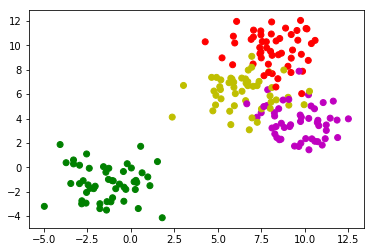

In [4]:
dataset = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.5)
data = dataset[0]
datax = data[:,0]
datay = data[:,1]
label = dataset[1]
plt.scatter(data[:,0], data[:,1],
            c=label,
            cmap=matplotlib.colors.ListedColormap(color_list))


### Make my own K-NearestNeighbors

In [1]:
class KNearestNeighborsMy(object):
    
    def __init__(self, k, data=None, label=None):
        self.k = k
        self.data = data
        self.label = label
        
    def set_data(self, data, label):
        self.data = data
        self.label = label
        
    def _distance(self, point1, point2):
        diff = point1 - point2 # difference between center and data point
        sqrd = np.square(diff) # elementwise squaring 
        sumd = np.sum(sqrd, axis=1) # not summing all data. but only n_features,i.e. columns (axis = 1)
        sqrt = np.sqrt(sumd) # square root after sum
        return sqrt
    
    def calculate_distance(self, new_points):
        if len(new_points.shape)==1:
            new_points = new_points.reshape(1,-1)
#         print(new_points)
        dist = []
        for newpt in new_points:
            distance = self._distance(self.data, newpt)
            dist.append(distance)
        dist = np.array(dist)
        return dist
    
    def get_nearest_classes(self, dist):
        top_indx = dist.argsort()[:,:self.k]
        nearest_classes = self.label[top_indx]
        return nearest_classes
    
    def predict(self, new_points):
        dist = self.calculate_distance(new_points)
        nearest = self.get_nearest_classes(dist)
        classes = []
        for near in nearest:
            unique, counts = np.unique(near, return_counts=True)
            classification = unique[counts.argmax()]
            classes.append(classification)
        return np.array(classes)

### Obvious data points

In [148]:
test_point = np.array([[0,-2.5], [15,5], [-2.5,6], [5,8]])
# test_point = np.array([0,-2.5])
test_point

array([[ 0. , -2.5],
       [15. ,  5. ],
       [-2.5,  6. ],
       [ 5. ,  8. ]])

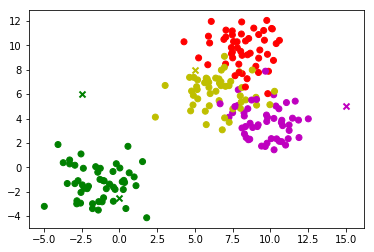

In [151]:
myknn = KNearestNeighborsMy(k=5)
myknn.set_data(data, label)
classes = myknn.predict(test_point)
plt.scatter(data[:,0], data[:,1],
            c=label,
            cmap=matplotlib.colors.ListedColormap(color_list))
for i, point in enumerate(test_point):
    plt.scatter(point[0], point[1],
                marker='x', lw=2,
                c=color_list[classes[i]],)

### Drawing Decision Boundary

In [152]:
myknn = KNearestNeighborsMy(k=10)
myknn.set_data(data, label)

h = 0.1
xx, yy = np.meshgrid(np.arange(datax.min(), datax.max(), h), np.arange(datay.min(), datay.max(), h))
xxyy = np.c_[xx.ravel(), yy.ravel()]
classxy = myknn.predict(xxyy)

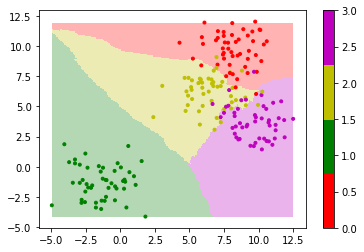

In [153]:
# advanced way of showing
plt.imshow(classxy.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=matplotlib.colors.ListedColormap(color_list),
           alpha=0.3,
           aspect='auto', origin='lower')
# plt.scatter(centers[:,0], centers[:, 1], marker='o', c=color_list,lw=5)
plt.scatter(datax, datay, marker = '.', c=label, cmap=matplotlib.colors.ListedColormap(color_list))
plt.colorbar()